# Animation with Matplotlib
## Project Team
* Roman Kostner
* Duxiao Hao
* Christian Lemp

## References

* [Animations with Matplotlib - Parul Pandey](https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c)
* https://mathworld.wolfram.com/ParametricEquations.html
* https://stackoverflow.com/a/51528612
* https://matplotlib.org/api/_as_gen/matplotlib.animation.FuncAnimation.html#matplotlib-animation-funcanimation

## Intro

### Situation
For systems science analysts who are often interested in the underlying dynamics, or change over time within a process, data visualization is a powerful tool.

### Complication
However, most plotting solutions only offer a static image - the final result. This doesn't allow the scientist to observe how a process changes over time.

### Resolution
The `animate` feature of matplotlib, along with some other configurations, allow to create animated visualizations directly into a Jupyter notebook to make it easier to gain insight

# Step 1: Environment and Notebook

## Import Python packages

`animation` is a function within matplotlib...

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

# to display static plots in the notebook
%matplotlib inline

plt.style.use('seaborn-pastel')

# Step 2

## Configure analysis

In [60]:
maze_height = 50
maze_width = 50
pct_maze_fill = 0.20

## Setting up the canvas
Need to create an empty working space, which we will fill with data in the following step...

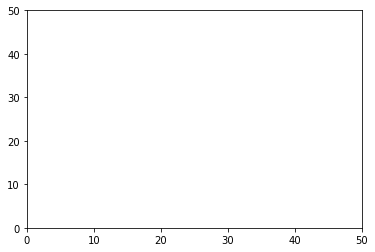

In [61]:
# Create an empty canvas,then set its dimensions
fig = plt.figure()
ax = plt.axes(xlim=(0,maze_width), ylim=(0,maze_height))
# Then create an empty line object
line, = ax.plot([], [], lw=3)
# The line object will be populated with data later.

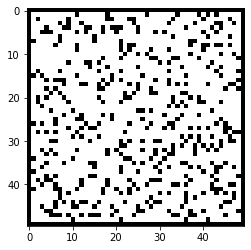

In [62]:
# Initialize maze
maze = np.zeros([maze_height, maze_width])

# Fill in maze outer walls
for i in range(50):
    maze[i, 0] = 1
    maze[i, 49] = 1
    maze[0, i] = 1
    maze[49, i] = 1

# Fill in maze inner walls
for i in range(int(pct_maze_fill * maze_height * maze_width)):
    # assign x, y randomly over each iteration
    x = np.random.randint(1, 49)
    y = np.random.randint(1, 49)
    
    # if 1 or fewer NSEW blocks around x,y are filled in, fill x,y
    if maze[x-1,y] + maze[x+1,y] + maze[x,y+1] + maze[x,y-1] <= 1:     
        maze[x,y] = 1
        
# Plot the maze
plt.imshow(maze, cmap="binary")

In [ ]:
# Need to convert `maze` binary matrix into True/False
# and list coordinates to fill in.
# np.argwhere(maze.astype(bool)).tolist()
# maze.astype(bool)

In [56]:
int(pct_maze_fill * maze_height * maze_width)

750

# Step 3
## Create the `init` function
Init function does this...

In [63]:
# Initialize your animation.
def init():
#     plt.imshow(maze, cmap="binary")
    maze_coords = np.argwhere(maze.astype(bool)).tolist()
    ax.scatter(*zip(*maze_coords), cmap="binary", marker="s", c="black")
    line.set_data([],[])
    return line,

In [42]:
# np.argwhere(maze.astype(bool)).tolist()

In [43]:
# np.argwhere(maze.astype(bool)).tolist()

# Step 4
## Create the `animate` function
Explain in detail how this function works

## Run maze algorithm and fill `path` list

In [64]:
x, y = 1, 1
target = (40, 40)
path = [(x, y)]
print("path start:", path)
while (x, y) != target:
    next_locations = [(x+dx, y+dy) for dx, dy
                    in [(-1,0),(1,0),(0,-1),(0,1)]
                    if maze[x+dx, y+dy]==0]
    j = np.random.randint(len(next_locations))
    x, y = next_locations[j]
    
    # reduce redundancy by only including new locations not 
    # already in the path
    if (x, y) not in path:
        path.append((x, y))
    else:
#         # if the path was visited, trim all locations since it was visited the first time
        k = path.index((x, y)) # find which step this location was visited
        path = path[:k+1]
print("---")
print("finished. (x,y) =",(x, y))
print("number of steps:", len(path))

path start: [(1, 1)]
---
finished. (x,y) = (40, 40)
number of steps: 177


In [9]:
# path

In [ ]:
# t = np.linspace(0,2*np.pi)
# x = np.sin(t)

# fig, ax = plt.subplots()
# ax.axis([0,4*np.pi,-1,1])
# l, = ax.plot([],[])

# def animate(i):
#     l.set_data(t[:i], x[:i])

# ani = FuncAnimation(fig, animate, frames=len(t))

# from IPython.display import HTML
# plt.imshow(maze, cmap="binary")
# HTML(ani.to_jshtml())

In [65]:
# Design visualization
def animate(i):
    # Add data to the line
    # About the data structure:
    # ax.plot() is stored in a variable named line above.
    # Initialized as ax.plot([], [], lw=3)
    # Each "i" update in the simulation will change x, y
    # And the line will animate.
    x = [x for (x,y) in path[:i]]
    y = [y for (x,y) in path[:i]]
#     print("x:", x, " y:", y)
    line.set_data(x, y)
    return line,

In [52]:
path[0:5]

i = 6

In [53]:
[x for (x,y) in path[:i]]

[1, 2, 2, 2, 2, 2]

In [54]:
[y for (x,y) in path[:i]]

[1, 1, 2, 3, 4, 5]

In [ ]:
# First 4 x, y coordinates of solution path
print("x:", [x for (x,y) in path[:4]])
print("y:", [y for (x,y) in path[:4]])

In [68]:
# frames = set to the length of the number of iterations.
anim = FuncAnimation(fig, animate, init_func=init,
                    frames=len(path), interval=60, blit=True)

In [69]:
from IPython.display import HTML
HTML(anim.to_jshtml())

In [ ]:
print(output)

plt.imshow(output.T, cmap = "hot")
plt.axis("off")
plt.show()
    
mandelbrot(1000,1000,150)

In [ ]:
anim.save('sin.gif',writer='imagemagick') 

# Display animation

<!-- ![ChessUrl](https://upload.wikimedia.org/wikipedia/commons/7/71/ChessPawnSpecialMoves.gif "chess -->
![Play the moments](sin.gif "sin")